# Лабораторная работа №2

In [21]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

In [22]:
handler = Signal_Handler()
display = Signal_Display()

## Задание 1

In [23]:
def DFT_slow(x):
    
    x = np.asarray(x, dtype = float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)

    return np.dot(M, x)

In [24]:
x, y, dt = handler.make_signal('cos', interval = (0, 0.2), A = 1, w = Converter(f = [50, 150]).w)

In [25]:
%timeit np.fft.fft(y)
%timeit DFT_slow(y)

47.5 µs ± 9.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
172 ms ± 3.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
xfft, yfft = handler.find_spectrum(y, dt)
yifft = handler.from_spectrum(yfft)

c:\Users\Sanya\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


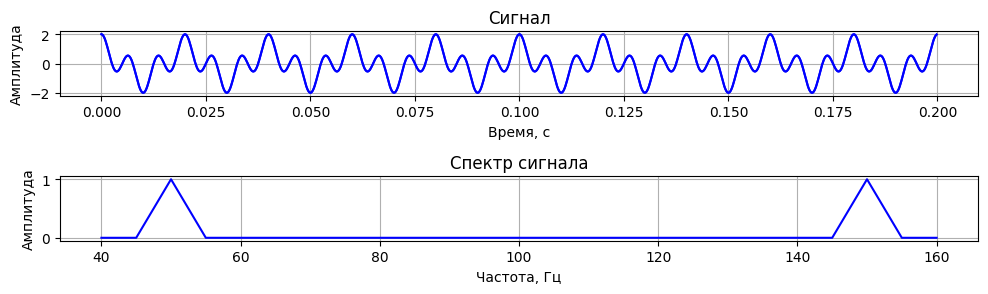

In [27]:
display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(0, x, yifft)

display.make_plot(1, xfft, yfft, title = 'Спектр сигнала', is_spectrum = True,  interval = (40, 160))

display.plot()

In [28]:
y += np.random.normal(0, 1, y.size)

In [29]:
xfft, yfft = handler.find_spectrum(y, dt)
yifft = handler.from_spectrum(yfft)

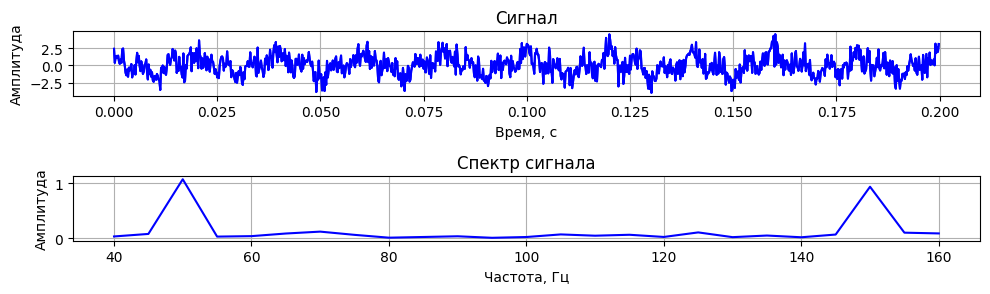

In [30]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(0, x, yifft)

display.make_plot(1, xfft, yfft, title = 'Спектр сигнала', is_spectrum = True,  interval = (40, 160))

display.plot()

## Задание 2

In [31]:
x, y, dt = handler.make_signal('rect', interval = (-4, 4), A = 2, w = Converter(T = 2).w)

In [32]:
xfft, yfft0 = handler.find_spectrum(y, dt)
yfft1 = DFT_slow(y)

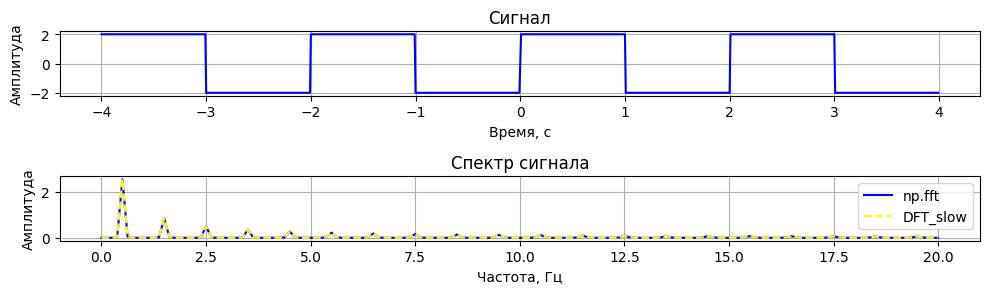

In [33]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, xfft, yfft0, is_spectrum = True,  interval = (0, 20), legend = 'np.fft')
display.make_plot(1, xfft, yfft1, is_spectrum = True,  interval = (0, 20), legend = 'DFT_slow', 
                  color = 'yellow', linestyle = '--', title = 'Спектр сигнала')

display.plot()

In [34]:
y1 = y + np.random.normal(0, 1, y.size)

In [35]:
xfft, yfft0 = handler.find_spectrum(y1, dt)
yfft1 = DFT_slow(y1)

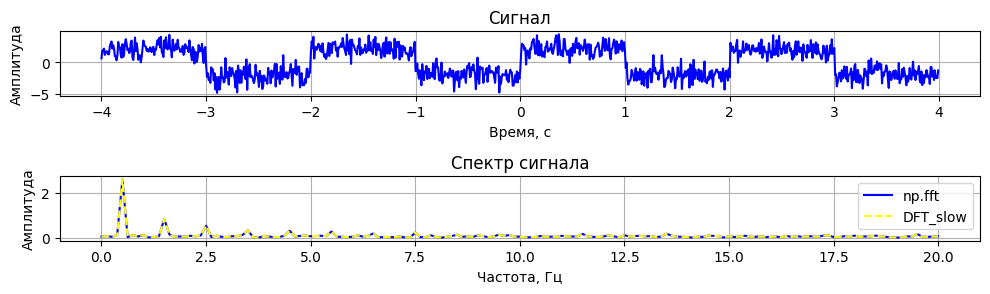

In [36]:
display.clear()

display.make_plot(0, x, y1, title = 'Сигнал')
display.make_plot(1, xfft, yfft0, is_spectrum = True,  interval = (0, 20), legend = 'np.fft')
display.make_plot(1, xfft, yfft1, is_spectrum = True,  interval = (0, 20), legend = 'DFT_slow', 
                  color = 'yellow', linestyle = '--', title = 'Спектр сигнала')

display.plot()

## Задание 3

In [37]:
def DFT_fast(x: np.ndarray):

    N = x.size
    W  = lambda m, n: np.exp(-2j * np.pi * m / n)
    x0 = lambda m: x[2 * m]
    x1 = lambda m: x[2 * m + 1]
    X0k = lambda k: np.sum([x0(m) * W(m * k, N // 2) for m in range(N // 2)])
    X1k = lambda k: np.sum([x1(m) * W(m * k, N // 2) for m in range(N // 2)])
    Xk0 = lambda k: X0k(k) + W(k, N) * X1k(k)
    Xk1 = lambda k: X0k(k) - W(k, N) * X1k(k)

    return np.concatenate(([Xk0(k) for k in range(N // 2)], [Xk1(k) for k in range(N // 2)]))


In [38]:
x, y, dt = x, y, dt = handler.make_signal('cos', interval = (0, 0.2), A = 1, w = Converter(f = 50).w)
xfft = handler.find_spectrum(y, dt)[0]
yfft = DFT_slow(y)

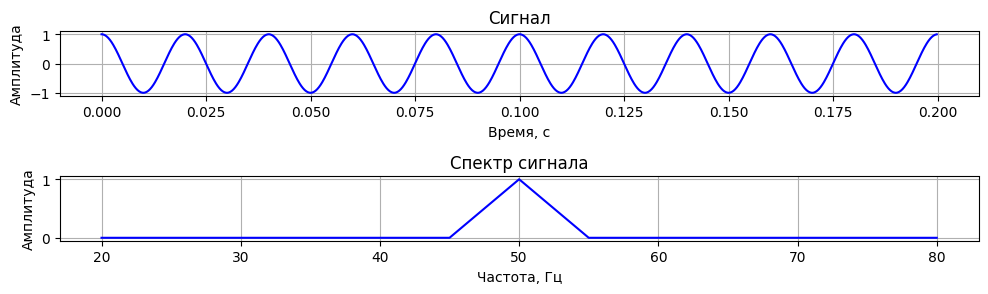

In [39]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, xfft, yfft, is_spectrum = True, interval = (20, 80), title = 'Спектр сигнала')

display.plot()

In [40]:
%timeit np.fft.fft(y)
%timeit DFT_fast(y)

41.8 µs ± 419 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.05 s ± 9.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
